<a href="https://colab.research.google.com/github/nugomes2019/00-colab/blob/main/CovidBeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Beta



In [ ]:
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

plt.style.use("seaborn-deep")

## COVID-19 Data

We will use this NY Times [github repo](https://github.com/nytimes/covid-19-data) as the source of our COVID-19 Data (US only). One key problem with this dataset is that they retroactively fix datapoints, meaning that this data is not what we would have observed at the time. This limits the out-of-sample validity of this investigation.

We will use COVID cases and deaths as two separate "factors".

In [ ]:
# Covid data
covid = pd.read_csv("nytimes_us_data.csv", parse_dates=["date"], index_col="date")
covid.head()

cases  deaths
date                     
2020-01-21      1       0
2020-01-22      1       0
2020-01-23      1       0
2020-01-24      2       0
2020-01-25      3       0

In [ ]:
def dual_plot(series1, series2, label1="1", label2="2", color1="darkblue", color2="darkred", figsize=(9,6)):
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.set_ylabel(label1, color=color1)
    series1.plot(ax=ax1, color=color1)
    ax1.tick_params(axis="y", labelcolor=color1)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel(label2, color=color2)  # we already handled the x-label with ax1
    series2.plot(ax=ax2, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped


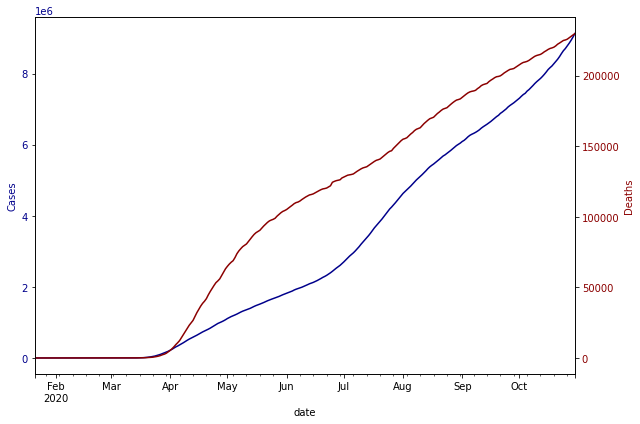

In [ ]:
dual_plot(covid.cases, covid.deaths, "Cases", "Deaths")
plt.show()

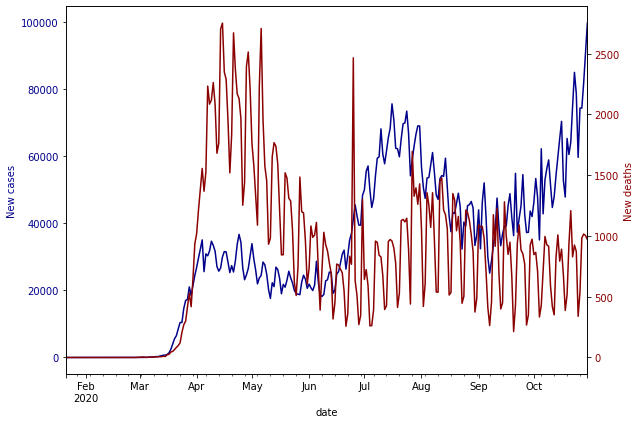

In [ ]:
dual_plot(covid.cases.diff(), covid.deaths.diff(), "New cases", "New deaths")
plt.show()

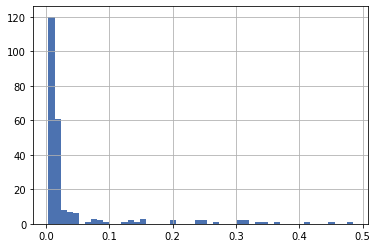

In [ ]:
covid.cases.iloc[50:].pct_change().hist(bins=50);

## Asset prices

We will be computing the beta of S&P500 constituents to each COVID factor (cases and deaths"). In other words, we regress the asset returns to the daily percentage change in COVID.

We get the SPY constituents from [here](https://github.com/datasets/s-and-p-500-companies-financials) then use yfinance to pull historical YTD adjusted closes.

In [ ]:
df = pd.read_csv("spy_constituents.csv")
tickers = df.Symbol.tolist()
df.head()

Symbol                 Name                  Sector   Price  Price/Earnings  \
0    MMM           3M Company             Industrials  222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24           27.76   
2    ABT  Abbott Laboratories             Health Care   56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48           19.41   
4    ACN        Accenture plc  Information Technology  150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
0        2.332862            7.92       259.77       175.490  138721055226   
1        1.147959            1.70        68.39        48.925   10783419933   
2        1.908982            0.26        64.60        42.280  102121042306   
3        2.499560            3.29       125.86        60.050  181386347059   
4        1.714470            5.44       162.60       114.820   98765855553   

         EBITDA  Price/Sales  Price/Book  \
0  9.048000e+09     4.390271       11.34   
1  6.010000e+08     3.575483        6.35   
2  5.744000e+09     3.740480        3.19   
3  1.031000e+10     6.291571       26.14   
4  5.643228e+09     2.604117       10.62   

                                         SEC Filings  
0  http://www.sec.gov/cgi-bin/browse-edgar?action...  
1  http://www.sec.gov/cgi-bin/browse-edgar?action...  
2  http://www.sec.gov/cgi-bin/browse-edgar?action...  
3  http://www.sec.gov/cgi-bin/browse-edgar?action...  
4  http://www.sec.gov/cgi-bin/browse-edgar?action...

In [ ]:
# price_df = yf.download(tickers, period="ytd")["Adj Close"]
# price_df.to_csv("stock_prices.csv")

In [ ]:
price_df = pd.read_csv("stock_prices.csv", parse_dates=["Date"], index_col="Date")
# Drop cols with missing
price_df = price_df.dropna(how="any", axis=1)
price_df.head()

A        AAL         AAP       AAPL       ABBV        ABC  \
Date                                                                            
2020-01-02  85.398193  28.982893  158.154831  74.573036  84.852608  83.938957   
2020-01-03  84.027046  27.548195  158.164749  73.848030  84.047203  82.883308   
2020-01-06  84.275452  27.219410  155.565384  74.436470  84.710480  84.096809   
2020-01-07  84.533775  27.119778  153.720047  74.086395  84.227234  83.494980   
2020-01-08  85.368385  27.737495  151.954056  75.278160  84.824188  84.303986   

                  ABMD        ABT         ACN        ADBE  ...        XLNX  \
Date                                                       ...               
2020-01-02  168.809998  85.600449  206.829712  334.429993  ...  100.399811   
2020-01-03  166.820007  84.556908  206.485229  331.809998  ...   98.088585   
2020-01-06  179.039993  84.999916  205.136902  333.709991  ...   96.044044   
2020-01-07  180.350006  84.527367  200.707962  333.390015  ...   98.236748   
2020-01-08  178.690002  84.871948  201.101685  337.869995  ...   97.960182   

                  XOM       XRAY        XRX        XYL         YUM  \
Date                                                                 
2020-01-02  67.240555  56.502354  35.372929  79.031929  100.691872   
2020-01-03  66.699974  55.877087  34.913166  79.497108  100.376495   
2020-01-06  67.212105  56.184761  34.386356  78.982445  100.317375   
2020-01-07  66.662033  56.482506  34.434250  78.685516  100.494774   
2020-01-08  65.656754  57.077999  34.415089  78.952736  100.672165   

                   ZBH        ZBRA       ZION         ZTS  
Date                                                       
2020-01-02  148.258896  259.140015  50.968010  133.375900  
2020-01-03  147.871353  256.049988  50.248787  133.395782  
2020-01-06  147.016785  258.010010  49.636467  132.371658  
2020-01-07  146.887604  256.470001  49.335167  132.819077  
2020-01-08  148.646439  247.639999  49.821129  132.530716  

[5 rows x 499 columns]

In [ ]:
# spy_df = yf.download("^GSPC", period="ytd")["Adj Close"]
# spy_df.to_csv("spy_prices.csv")
spy_df = (
    pd.read_csv("spy_prices.csv", parse_dates=["Date"], index_col="Date")
    .rename({"Adj Close":"SPY"}, axis=1)
)
spy_df.head()

SPY
Date                   
2020-01-02  3257.850098
2020-01-03  3234.850098
2020-01-06  3246.280029
2020-01-07  3237.179932
2020-01-08  3253.050049

## Computing betas

In [ ]:
joined = price_df.join(covid, how="inner").join(spy_df, how="inner")
tickerlist = joined.columns[:-3]
joined.iloc[20:]

A        AAL         AAP        AAPL       ABBV  \
2020-02-19   84.802040  28.330000  139.016724   80.541367  90.406998   
2020-02-20   83.798531  28.510000  141.358139   79.715088  90.493431   
2020-02-21   84.523842  27.820000  139.502869   77.910744  91.194481   
2020-02-24   79.983185  25.450001  138.808395   74.209946  89.446648   
2020-02-25   77.449554  23.120001  136.516586   71.696297  85.643684   
...                ...        ...         ...         ...        ...   
2020-10-26  104.629997  11.800000  151.210007  115.050003  83.919998   
2020-10-27  106.040001  11.230000  150.410004  116.599998  82.709999   
2020-10-28  101.660004  10.950000  146.380005  111.199997  80.489998   
2020-10-29  102.019997  11.160000  146.000000  115.320000  80.669998   
2020-10-30  102.089996  11.280000  147.279999  108.860001  85.099998   

                  ABC        ABMD         ABT         ACN        ADBE  ...  \
2020-02-19  94.267532  167.899994   88.346695  213.330124  383.279999  ...   
2020-02-20  95.654846  168.080002   87.456902  211.334335  378.959991  ...   
2020-02-21  96.120583  166.740005   86.458351  209.348465  372.950012  ...   
2020-02-24  94.069351  165.289993   83.670326  201.908783  357.410004  ...   
2020-02-25  92.087479  158.800003   80.210014  194.735870  347.799988  ...   
...               ...         ...         ...         ...         ...  ...   
2020-10-26  98.370003  288.320007  109.000000  219.229996  475.200012  ...   
2020-10-27  97.650002  290.510010  108.580002  220.660004  478.559998  ...   
2020-10-28  95.699997  283.000000  106.419998  213.940002  456.970001  ...   
2020-10-29  94.589996  254.610001  105.000000  216.440002  461.109985  ...   
2020-10-30  96.070000  251.880005  105.110001  216.910004  447.100006  ...   

                  XRX        XYL         YUM         ZBH        ZBRA  \
2020-02-19  35.219673  87.058846  104.132797  159.010651  240.500000   
2020-02-20  35.229252  87.751678  102.826073  157.390930  242.720001   
2020-02-21  34.807800  87.613098  102.469681  156.397232  238.389999   
2020-02-24  33.390205  85.544518   99.242447  153.356537  227.399994   
2020-02-25  34.922745  83.466026   96.965561  148.785553  220.000000   
...               ...        ...         ...         ...         ...   
2020-10-26  18.920000  90.070000   99.199997  139.509995  295.100006   
2020-10-27  18.520000  89.059998   97.989998  138.600006  289.279999   
2020-10-28  17.230000  87.349998   95.059998  133.369995  285.200012   
2020-10-29  17.650000  86.860001   94.940002  133.839996  291.970001   
2020-10-30  17.379999  87.139999   93.330002  132.100006  283.640015   

                 ZION         ZTS    cases  deaths          SPY  
2020-02-19  44.853638  143.446472       25       0  3386.149902  
2020-02-20  45.284451  142.938660       27       0  3373.229980  
2020-02-21  44.481567  141.624268       30       0  3337.750000  
2020-02-24  42.846432  137.800613       43       0  3225.889893  
2020-02-25  41.495243  134.245834       45       0  3128.209961  
...               ...         ...      ...     ...          ...  
2020-10-26  32.459999  160.479996  8777118  225698  3400.969971  
2020-10-27  31.080000  162.470001  8851546  226681  3390.679932  
2020-10-28  30.600000  158.690002  8933448  227697  3271.030029  
2020-10-29  31.559999  161.190002  9024176  228701  3310.110107  
2020-10-30  32.270000  158.550003  9123960  229672  3269.959961  

[179 rows x 502 columns]

In [ ]:
# Regression approach
from sklearn import linear_model

rets = joined.pct_change().dropna()
betas = {}

for ticker in tickerlist:
    try:
        reg = linear_model.LinearRegression()
        reg.fit(rets[["cases", "SPY"]],rets[ticker])
        betas[ticker] = reg.coef_
    except:
        print(ticker)
    


In [ ]:
betas = pd.DataFrame(betas, index=["cases_beta", "SPY_beta"]).transpose()

In [ ]:
df_merged = df.merge(betas, left_on="Symbol", right_index=True, how="inner")
df_merged.head()

Symbol                 Name                  Sector   Price  Price/Earnings  \
0    MMM           3M Company             Industrials  222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24           27.76   
2    ABT  Abbott Laboratories             Health Care   56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48           19.41   
4    ACN        Accenture plc  Information Technology  150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
0        2.332862            7.92       259.77       175.490  138721055226   
1        1.147959            1.70        68.39        48.925   10783419933   
2        1.908982            0.26        64.60        42.280  102121042306   
3        2.499560            3.29       125.86        60.050  181386347059   
4        1.714470            5.44       162.60       114.820   98765855553   

         EBITDA  Price/Sales  Price/Book  \
0  9.048000e+09     4.390271       11.34   
1  6.010000e+08     3.575483        6.35   
2  5.744000e+09     3.740480        3.19   
3  1.031000e+10     6.291571       26.14   
4  5.643228e+09     2.604117       10.62   

                                         SEC Filings  cases_beta  SPY_beta  
0  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.001437  0.840696  
1  http://www.sec.gov/cgi-bin/browse-edgar?action...    0.013047  0.718005  
2  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.002372  0.855342  
3  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.011371  0.681354  
4  http://www.sec.gov/cgi-bin/browse-edgar?action...    0.005272  1.051471

## Data analysis

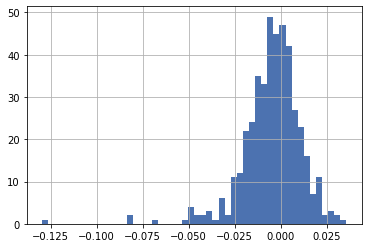

In [ ]:
df_merged.cases_beta.hist(bins=50);

In [ ]:
# Worst hit
df_merged.sort_values(by="cases_beta").iloc[:10]

Symbol                  Name                  Sector  Price  \
49     APA    Apache Corporation                  Energy  37.73   
346    OXY  Occidental Petroleum                  Energy  68.47   
292    MRO    Marathon Oil Corp.                  Energy  15.68   
348    OKE                 ONEOK                  Energy  54.40   
205    GPS              Gap Inc.  Consumer Discretionary  31.17   
430    TPR        Tapestry, Inc.  Consumer Discretionary  48.85   
229    HES      Hess Corporation                  Energy  43.00   
272    KSS          Kohl's Corp.  Consumer Discretionary  60.34   
219    HAL       Halliburton Co.                  Energy  47.41   
406    SLB     Schlumberger Ltd.                  Energy  67.40   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
49          -251.53        2.528445           -3.72        57.90   
346          195.63        4.408186           -0.75        78.09   
292          -32.00        1.224740           -2.65        19.52   
348           34.00        5.443620            1.66        61.36   
205           15.35        2.820356            1.69        35.68   
430             NaN        0.000000            2.09        50.71   
229           -9.33        2.267060          -19.94        55.48   
272           16.01        3.496504            3.12        69.14   
219           38.86        1.448984           -0.53        57.86   
406           44.93        2.867383           -1.08        82.71   

     52 Week High   Market Cap        EBITDA  Price/Sales  Price/Book  \
49         38.140  15066280977  3.265000e+09     3.651366        2.22   
346        57.200  53467692395  5.205000e+09     6.044895         NaN   
292        10.550  13875005314  2.266000e+09     4.657875         NaN   
348        47.140  21988472489  1.851783e+09     2.615956        4.03   
205        21.020  12684517721  1.959000e+09     1.128974        3.93   
430        36.690  14247199374  0.000000e+00     4.078549        4.35   
229        37.250  14016129999 -8.190000e+08     3.780475        1.08   
272        35.160  10570861198  2.286000e+09     0.855776        2.04   
219        38.181  43356557470  2.910000e+09     2.142422        4.74   
406        61.020  96529311126  3.222000e+09     3.229783        2.64   

                                           SEC Filings  cases_beta  SPY_beta  
49   http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.129761  1.671640  
346  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.082103  1.638488  
292  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.081550  1.264306  
348  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.069308  1.493620  
205  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.051908  1.439469  
430  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.048289  1.583849  
229  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.048166  1.361802  
272  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.047111  1.400060  
219  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.047069  1.762542  
406  http://www.sec.gov/cgi-bin/browse-edgar?action...   -0.043947  1.383478

In [ ]:
# Biggest beneficiaries
df_merged.sort_values(by="cases_beta").iloc[-10:]

Symbol                  Name                  Sector   Price  \
480    WMT       Wal-Mart Stores        Consumer Staples  100.02   
326   NFLX          Netflix Inc.  Information Technology  250.10   
224    HAS           Hasbro Inc.  Consumer Discretionary   96.48   
309   MCHP  Microchip Technology  Information Technology   79.90   
195   FLIR          FLIR Systems  Information Technology   46.46   
151   DLTR           Dollar Tree  Consumer Discretionary  101.58   
85     COG       Cabot Oil & Gas                  Energy   23.01   
247   INTC           Intel Corp.  Information Technology   42.75   
271   KLAC      KLA-Tencor Corp.  Information Technology   98.54   
116   CTXS        Citrix Systems  Information Technology   84.53   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
480           23.10        1.983471            4.39       109.98   
326          200.08        0.000000            1.25       286.81   
224           20.57        2.230483            4.34       116.20   
309           21.77        1.751297            0.66        99.17   
195           25.53        1.239669            1.21        52.88   
151           26.66        0.000000            3.77       116.65   
85            60.55        1.026958           -0.92        29.57   
247           12.32        2.654867            1.98        50.85   
271           16.59        2.298850            5.88       121.65   
116           20.37        0.000000           -0.24        95.00   

     52 Week High    Market Cap        EBITDA  Price/Sales  Price/Book  \
480       66.8900  304680931618  3.072100e+10     0.820994        3.89   
326      138.2600  114805404842  8.090280e+08     9.861594       30.80   
224       87.9200   12732072001  1.028425e+09     3.237568        5.82   
309       69.7600   19393095636  9.974920e+08     7.447518        5.90   
195       33.7500    6706992926  3.752670e+08     5.137961        3.52   
151       65.6300   25151198417  2.430300e+09     1.609759        4.08   
85        21.4000   10808821635  4.049510e+08     8.636729        4.21   
247       33.2300  211536000000  2.624700e+10     3.348876        3.34   
271       86.3300   16078622033  1.506642e+09     4.339586       12.93   
116       73.3346   13199167493  8.102680e+08     4.753871        6.73   

                                           SEC Filings  cases_beta  SPY_beta  
480  http://www.sec.gov/cgi-bin/browse-edgar?action...    0.021276  0.553764  
326  http://www.sec.gov/cgi-bin/browse-edgar?action...    0.021827  0.693140  
224  http://www.sec.gov/cgi-bin/browse-edgar?action...    0.023042  1.103237  
309  http://www.sec.gov/cgi-bin/browse-edgar?action...    0.023712  1.478947  
195  http://www.sec.gov/cgi-bin/browse-edgar?action...    0.026065  0.746490  
151  http://www.sec.gov/cgi-bin/browse-edgar?action...    0.027059  0.789291  
85   http://www.sec.gov/cgi-bin/browse-edgar?action...    0.027165  0.819988  
247  http://www.sec.gov/cgi-bin/browse-edgar?action...    0.029219  1.210357  
271  http://www.sec.gov/cgi-bin/browse-edgar?action...    0.029483  1.512150  
116  http://www.sec.gov/cgi-bin/browse-edgar?action...    0.035770  0.606636

In [ ]:
# We remove left-tail outliers so that the visualisations are smoother
df_merged = df_merged[df_merged.cases_beta > df_merged.cases_beta.quantile(0.01)].sort_values(by="cases_beta")

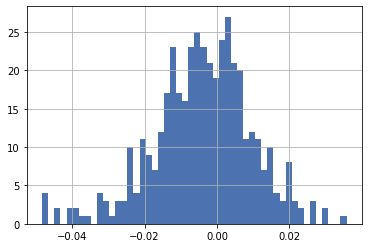

In [ ]:
df_merged.cases_beta.hist(bins=50);

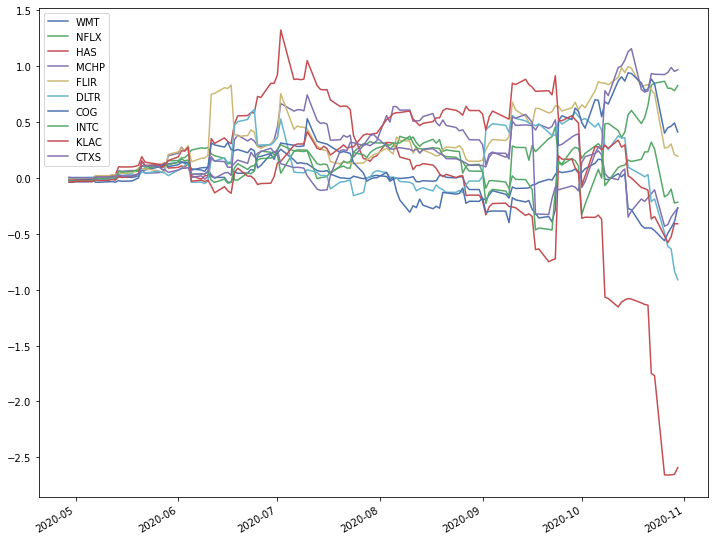

In [ ]:
# Plot top 10 rolling betas
fig, ax = plt.subplots(figsize=(12,10))
top_10_tickers = df_merged.sort_values(by="cases_beta").Symbol.iloc[-10:].tolist()

res = []
period = 42 # 2months

for t in top_10_tickers:
    rolling_beta = (rets[t].rolling(period).cov(rets["cases"]) / rets["cases"].rolling(period).var()).dropna()
    res.append(rolling_beta.rename(t))
rolling_betas_top = pd.concat(res, axis=1)
rolling_betas_top.plot(ax=ax)
plt.show()

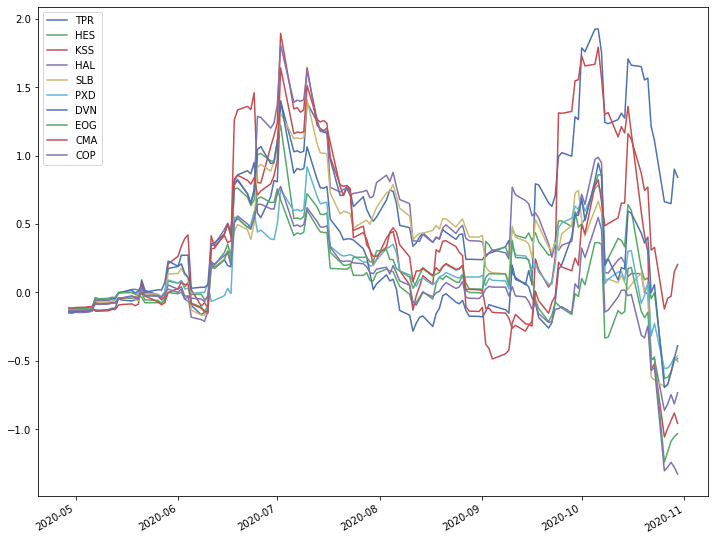

In [ ]:
# Plot bottom 10 rolling betas
fig, ax = plt.subplots(figsize=(12,10))
bottom_10_tickers = df_merged.sort_values(by="cases_beta").Symbol.iloc[:10].tolist()

res = []
period = 42

for t in bottom_10_tickers:
    rolling_beta = (rets[t].rolling(period).cov(rets["cases"]) / rets["cases"].rolling(period).var()).dropna()
    res.append(rolling_beta.rename(t))
rolling_betas_bottom = pd.concat(res, axis=1)
rolling_betas_bottom.plot(ax=ax)
plt.show()

In [ ]:
%%time
tickers = df_merged.Symbol.tolist()

res = []
period = 42

for t in tickers:
    rolling_beta = (rets[t].rolling(period).cov(rets["cases"]) / rets["cases"].rolling(period).var()).dropna()
    res.append(rolling_beta.rename(t))
rolling_betas = pd.concat(res, axis=1)
rolling_betas.head()

CPU times: user 2.01 s, sys: 15.1 ms, total: 2.02 s
Wall time: 2.1 s


TPR       HES       KSS       HAL       SLB       PXD  \
2020-04-29 -0.141542 -0.147661 -0.118860 -0.151279 -0.127507 -0.133896   
2020-04-30 -0.136429 -0.149648 -0.115174 -0.151404 -0.126885 -0.135944   
2020-05-01 -0.136229 -0.142607 -0.112129 -0.146815 -0.122646 -0.130923   
2020-05-04 -0.134264 -0.143388 -0.111393 -0.146807 -0.123393 -0.130120   
2020-05-05 -0.131100 -0.140488 -0.107637 -0.143489 -0.121543 -0.127640   

                 DVN       EOG       CMA       COP  ...       WMT      NFLX  \
2020-04-29 -0.144089 -0.119827 -0.113624 -0.133211  ...  0.000157 -0.004685   
2020-04-30 -0.144759 -0.120457 -0.114509 -0.135368  ... -0.004109 -0.007841   
2020-05-01 -0.137546 -0.115720 -0.111297 -0.130121  ... -0.005028 -0.007532   
2020-05-04 -0.137593 -0.117197 -0.109616 -0.130529  ... -0.005293 -0.008875   
2020-05-05 -0.134782 -0.114522 -0.105738 -0.129052  ... -0.005244 -0.007010   

                 HAS      MCHP      FLIR      DLTR       COG      INTC  \
2020-04-29 -0.015986 -0.038913 -0.007183  0.003676 -0.020941 -0.026791   
2020-04-30 -0.018013 -0.039732 -0.006118  0.003301 -0.025394 -0.028327   
2020-05-01 -0.015888 -0.036249 -0.006147  0.004339 -0.020762 -0.026149   
2020-05-04 -0.016116 -0.036372 -0.004748  0.004236 -0.020259 -0.026419   
2020-05-05 -0.013009 -0.035289 -0.003442  0.005626 -0.019598 -0.025701   

                KLAC      CTXS  
2020-04-29 -0.036798  0.005927  
2020-04-30 -0.034919  0.001030  
2020-05-01 -0.030154  0.001905  
2020-05-04 -0.030508  0.000929  
2020-05-05 -0.030529 -0.000674  

[5 rows x 432 columns]

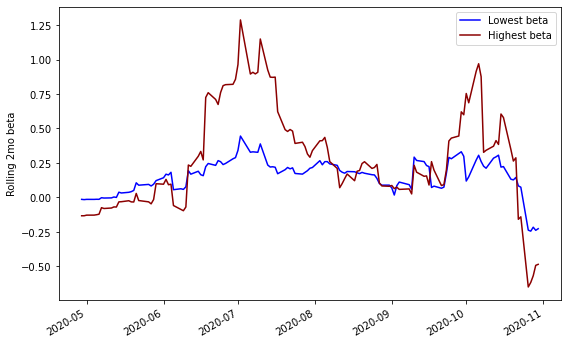

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
rolling_betas_top.mean(axis=1).plot(ax=ax, color="blue", label="Lowest beta")
rolling_betas_bottom.mean(axis=1).plot(ax=ax, color="darkred", label="Highest beta")
ax.legend();
ax.set_ylabel("Rolling 2mo beta")
plt.savefig("rolling_beta.png", dpi=400)
# plt.show()

## Visualisation

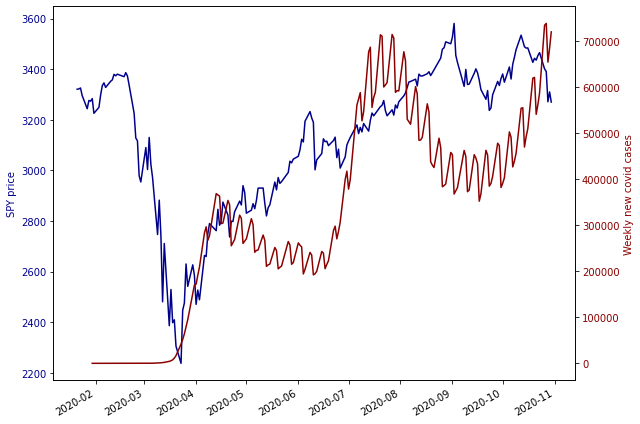

In [ ]:
# COVID-19 and the SPY
dual_plot(joined.SPY, joined.cases.diff(7), "SPY price", "Weekly new covid cases")
# plt.savefig("spy_covid.png", dpi=400)
plt.show()

In [ ]:
import plotly.express as px
df_merged["S&P500"] = "S&P500" # dummy root node
df_merged = df_merged.rename({"cases_beta": "COVID beta"}, axis=1)
fig = px.treemap(df_merged, path=['S&P500', 'Sector', 'Symbol'], values='Market Cap',
                  color='COVID beta', hover_data=['Price/Earnings', 'Price/Sales', 'Price/Book'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df_merged['COVID beta'], weights=df_merged['Market Cap'])
                )
fig.update_layout(margin=dict(l=0, r=0, t=20, b=0)),
fig.show()

In [ ]:
# Export to HTML
fig.write_html("heatmap.html", include_plotlyjs="cdn", full_html=False)

In [ ]:
# Hosting on Chart Studio
# import chart_studio
# import chart_studio.plotly as py
# # chart_studio.tools.set_credentials_file(username="", api_key="")
# chart_studio.tools.set_config_file(sharing='public')
# py.plot(fig, filename="COVID_beta", auto_open=True)

'https://plotly.com/~robertmartin8/5/'